# Explantory Notebook


In [2]:
import pandas as pd
df = pd.read_csv('your_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['id'])
df

,weight(kg),Gtp,Urine protein,ALT,LDL,eyesight(left),triglyceride,age,hearing(right),smoking
0,60,27,1,25,75,0.5,300,55,1,1
1,65,37,1,23,126,0.6,55,70,2,0
2,75,53,1,31,93,0.4,197,20,1,1
3,95,30,1,27,102,1.5,203,35,1,0
4,60,17,1,13,93,1.5,87,30,1,1
...,...,...,...,...,...,...,...,...,...,...
159251,45,13,1,26,159,1.5,47,40,1,0
159252,75,18,1,20,108,1.0,202,50,1,0
159253,50,12,1,9,93,1.5,45,40,1,0
159254,75,37,1,17,80,1.2,148,50,1,1


In [3]:
categorical = []
numerical = []
smoking = df['smoking']
temp = df.drop(columns=['smoking'])
for column in temp.columns:
    if df[column].nunique() > 10 :
        numerical.append(column)
    else:
        categorical.append(column)

The categorical features: ['Urine protein', 'hearing(right)']

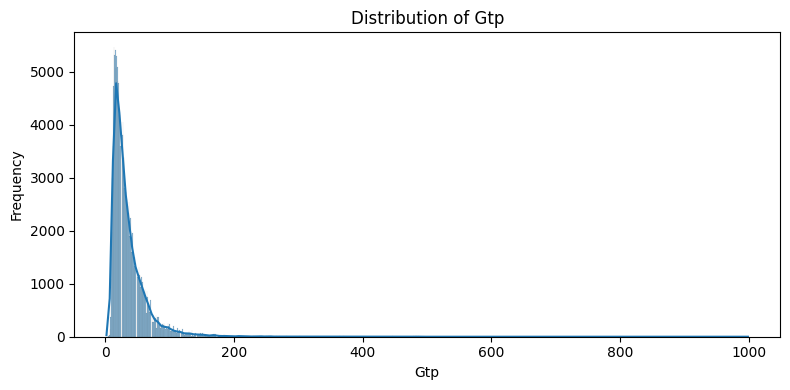

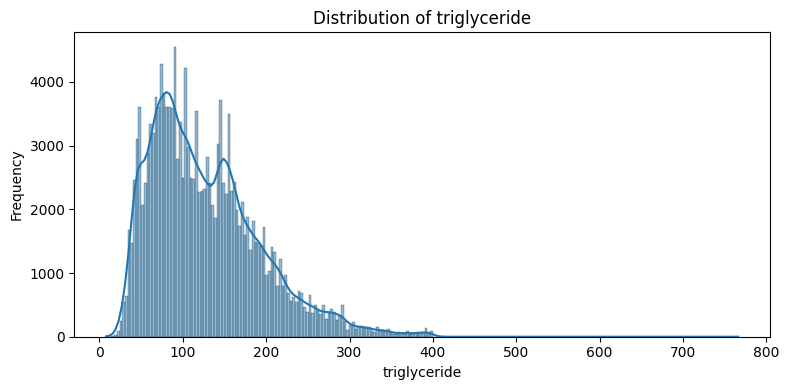

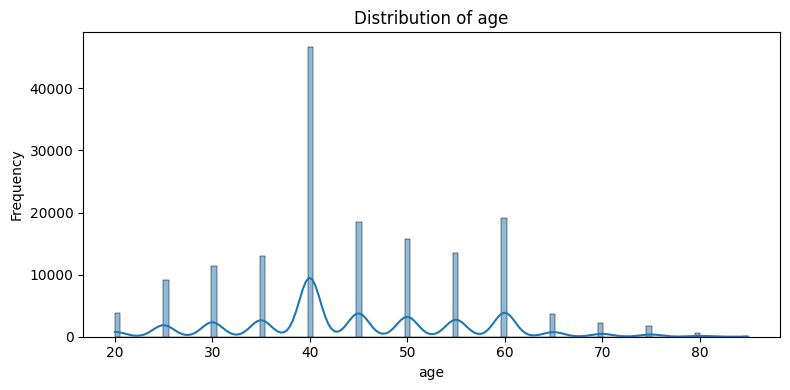

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
column_name = 'Gtp'
plt.figure(figsize=(8, 4))
sns.histplot(df[column_name], kde=True)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
# plt.show()
plt.tight_layout()

column_name = 'triglyceride'
plt.figure(figsize=(8, 4))
sns.histplot(df[column_name], kde=True)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
# plt.show()
plt.tight_layout()


column_name = 'age'
plt.figure(figsize=(8, 4))
sns.histplot(df[column_name], kde=True)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
# plt.show()
plt.tight_layout()


*   The GTP , ATP, LDL values are heavily right-skewed , will need some preprocessing before we do any further analysis

* Triglyceride Distribution Shape: The distribution of triglyceride is right-skewed (positively skewed)
   * **Concentration**: Most of the values are concentrated in the range 0-200. There is a long tail extending toward higher values, up to around 700.
* The age distribution is bimodal or multimodal. There are noticeable peaks at regular intervals. This suggests that the data might have been collected every 10 years.


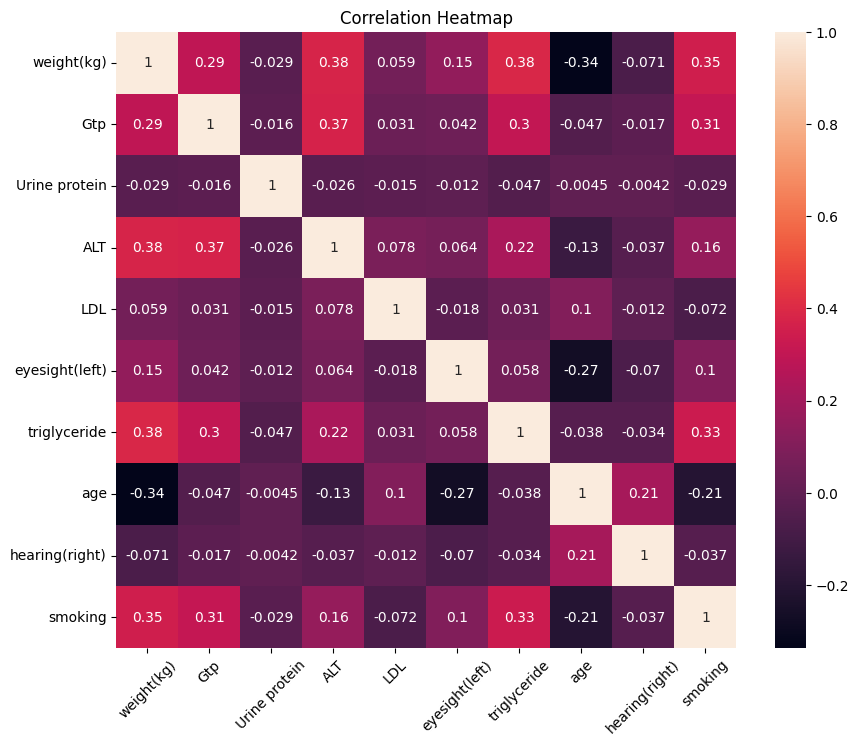

In [9]:
#correlation map:
#1 -> strongly correlated
#-1 -> strongly not correlated
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

**Correlation map analysis: From this correlation map we can analyse that:**

1) Weight , Gtp , ALT , eyesight(left) , triglyceride correlate positively with the target
2) Urine protein, LDL , age , hearing(right) correlate negatively with the target
3) Smoking has moderate positive correlations with:

  * Weight (0.35): Smokers may tend to have a slightly higher weight.
  * Triglyceride (0.34): Indicates smokers may have higher triglyceride levels.
  * Gtp (0.41): Gtp shows a notable correlation with smoking.

**Feature-Feature Correlations:**  
1) ALT and Triglyceride (0.33): Suggests a moderate relationship, possibly indicating similar health indicators.  
2) Age and Weight (-0.34): Older individuals in the dataset may weigh less.  
3) Eyesight (left) and Age (-0.34): Older individuals might have poorer eyesight.  
4) Hearing (right) and Age (0.21): Indicates a slight positive relationship between age and hearing ability.

In [ ]:
features = [
    'weight(kg)', 'Gtp', 'Urine protein', 'ALT', 'LDL',
    'eyesight(left)', 'triglyceride', 'age', 'hearing(right)'
]
y_feature = 'smoking'
for x_feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_feature, y=y_feature, data=df)
    plt.title(f'{x_feature} vs. {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title='Smoking')
    plt.show()

# ***Observations:***
1. Most smokers weigh in range 80kg to 100kg
2. Smokers have GTP upto 600 while non smokers only upto 400
3. Smoking has no effect on urine protein
4. Smokers have slightly higher ALT
5. Smokers have higher LDL
6. Eyesight(left) is the same in both
7. Triglyceride same in both
8. More smokers age around 60-70
9. Hearing (right) same in both


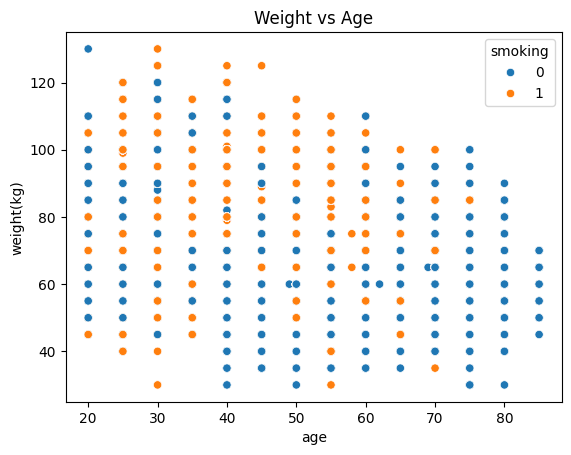

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Weight vs Age
sns.scatterplot(data=df, x="age", y="weight(kg)", hue="smoking")
plt.title("Weight vs Age")
plt.show()

**Observations**:
1.   Smokers tend to age around 20-30 and weigh 60-100

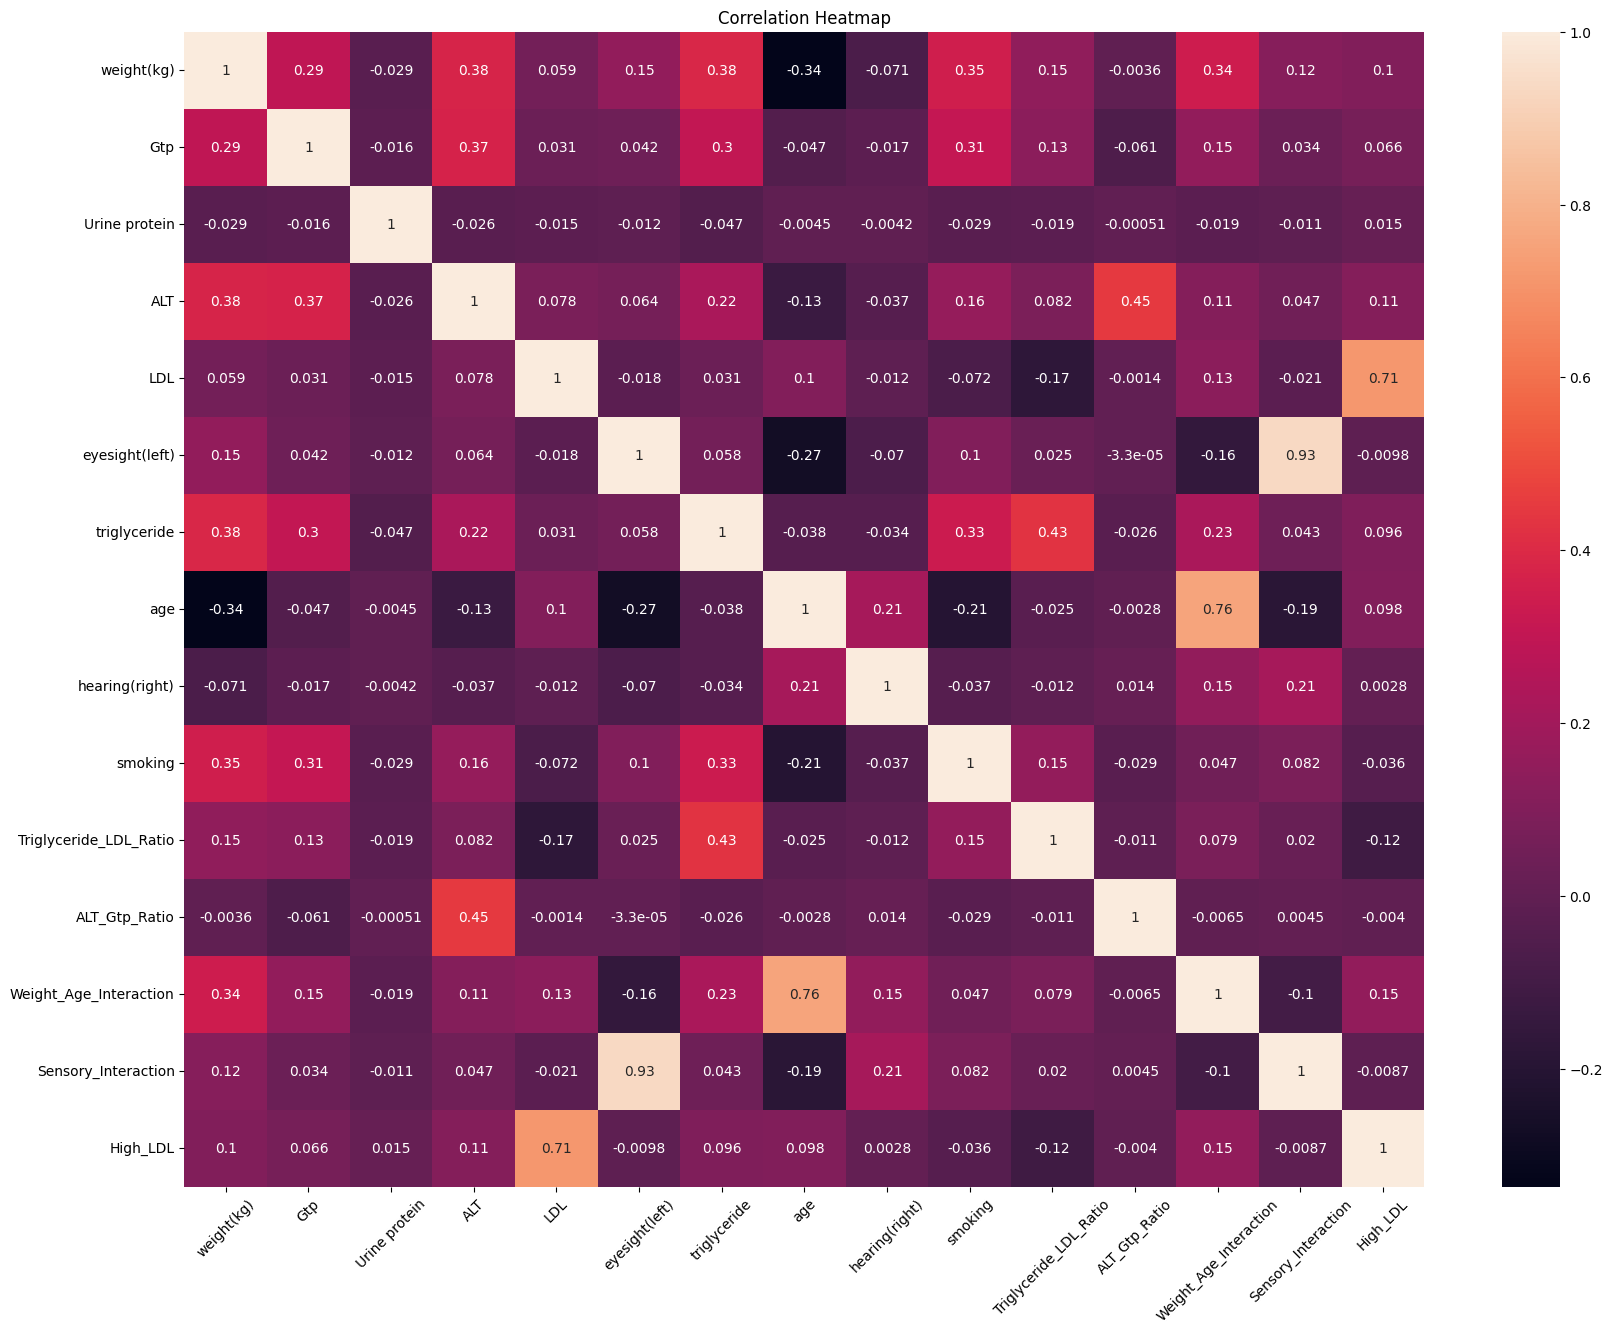

In [11]:
df['Triglyceride_LDL_Ratio'] = df['triglyceride'] / df['LDL']
df['ALT_Gtp_Ratio'] = df['ALT'] / df['Gtp']
# 2. Interaction Terms
df['Weight_Age_Interaction'] = df['weight(kg)'] * df['age']
df['Sensory_Interaction'] = df['eyesight(left)'] * df['hearing(right)']
# 5. Derived Features
# 6. Binary Indicators
df['High_LDL'] = (df['LDL'] > 100).astype(int)
df['High_ALT'] = (df['ALT'] > 40).astype(int)

df.drop(columns=["High_ALT"], inplace=True)

#correlation map:
#1 -> strongly correlated
#-1 -> strongly not correlated
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

1) Smoking highly correlated with
*   weight (positively)
*   Gtp (positively)
*   age (negatively)
*   triglyceride (postively)  

2) Smoking has low correlation with
  * hearing
  * eyesight  
-->So we will drop these 2 features


# Insights


*   After handling outliers with Z-score and plotting the histograms , we
found that the data is normally distributed --> We used Standard Scalar to scale the data
* **Featue Selection**
  * We used embedded method ( Random Forest ) and filter method ( Mutual classif) to choose the best features : selected_features = [
    "ALT_Gtp_Ratio",
    "Gtp",
    "weight(kg)",
    "triglyceride",
    "LDL",
    "age"
]


